### PREDICTING THE PROBABILITY OF DEFAULT BY A CREDIT CARD HOLDER USING DECISION TREES AND XGBOOST MODELS AND DEPLOYING ON GUI USING STREAMLIT

#### PROJECT DESCRIPTION AND BUSINESS UNDERSTANDING
The operation of credit cards involves customers purchasing goods or services, and the issuing bank compiling these transactions into a bill issued at the end of a billing cycle, expecting repayment within a specific timeframe(Rajani, 2009). Revolving credit cards allow customers to carry forward balances, subjecting unpaid amounts to interest. Late payments result in penalties, impacting the credit score if prolonged. Mechanically, merchants transmit transaction details to their acquiring banks, routed through card networks for approval by the issuing bank. Defaults from prolonged non-payment lead to write-offs, impacting credit scores and bank losses (Gurusamy, 2009). Credit card defaults result from factors like job loss excessive debt, and poor financial planning, influencing loan delinquency levels. The study emphasizes dynamic prediction models, using Decision Tree Based Models to depict probability of default and the extent of risk per billing cycle, distinguishing between defaulting and delinquency as terminal and varying severity states. The problem at hand centers on mitigating loan default risks in the financial sector, vital for institutional profitability. Past methods lacked depth, merely categorizing borrowers as ’good’ or ’bad’ without detailing extent of potential delinquency. To address this, a predictive model which foresees varying delinquency stages, offering insights into diverse repayment behaviors within billing cycles. This model transcends binary classifications, aiming for a nuanced understanding of customer performance. This model aims to enhance the precision of forecasting defaults, allowing institutions to better provision for bad debts and optimize profitability.

#### Different Data Features
There are 25 variables:
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)



#### HYPOTHESIS & QUESTIONS
##### Hypothesis
Individuals with lower credit limits, higher education levels, and consistent payment behavior are less likely to default on their credit card payments.

##### Exploratory Data Analysis (EDA) Questions
1. How does default status vary across different demographic groups (e.g., gender, education, marital status, age)?

2. Is there a correlation between the credit limit (LIMIT_BAL) and the probability of default?

3. What is the distribution of default status based on repayment status in the previous months (PAY_0 to PAY_6)?

4. How do the billing amounts (BILL_AMT1 to BILL_AMT6) relate to the likelihood of default?
   
5. How do the previous payment amounts (PAY_AMT1 to PAY_AMT6) influence the probability of default?

These questions aim to explore the relationships between various features and the target variable (default.payment.next.month). They will help uncover patterns, trends, and potential factors influencing the probability of default in the dataset, guiding further analysis and model development.

## 1. DATA UNDERSTANDING

In [2]:
import pandas as pd
from dotenv import dotenv_values
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report, ConfusionMatrixDisplay


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif
import statsmodels.api as sm

#import skopt
#from skopt import BayesSearchCV
import pickle
import joblib
 

import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/admin/CreditRisk/Data/UCI_Credit_Card.csv')

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#Checking for duplicates
df.duplicated().sum()

0

In [10]:
#Checking for null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
#Checking for columns in the dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [12]:
df.infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
#Checking the unique values in the SEX column
df['SEX'].unique()

array([2, 1], dtype=int64)

In [14]:
#Checking the unique values in the EDUCATION column
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

We see {0, 5, 6} represented. It is possible 0 represents missing data. 5, 6 are unspecified. Hopefully these values were deliberately assigned in a consistent and meaningful way.

In [15]:
#To determine what to do with missing values, we check their number 
len(df.loc[ (df['EDUCATION']==0) | (df['MARRIAGE']==0) ])

68

In [16]:
#What % of data is this?
68 / len(df)

0.002266666666666667

Approximately 23% of the dataset contains 0, the possibly missing values. We have more than enough data so we can remove the rows rather than try to impute their values.

In [27]:
# Replace 0 values in 'marriage' column
df['MARRIAGE'].replace(0, df['MARRIAGE'].mode()[0], inplace=True)

#Replace 0 values in 'EDUCATION' column
df['EDUCATION'].replace(0, df['EDUCATION'].mode()[0], inplace=True)

In [20]:
#To get rid of the null values 
df.loc[ (df['EDUCATION']!=0) & (df['MARRIAGE']!=0) ]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [21]:
#Checking for the unique values in the target column
df['default.payment.next.month'].unique()

array([1, 0], dtype=int64)

In [22]:
#Renaming the target column as Default
df.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [23]:
#Dropping the ID column as it'll not be used for prediction
# set axis=0 to remove rows, axis=1 to remove columns
df.drop('ID', axis=1, inplace=True)
df.head() # ID column should be gone, number of columns should be 25-1=24 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


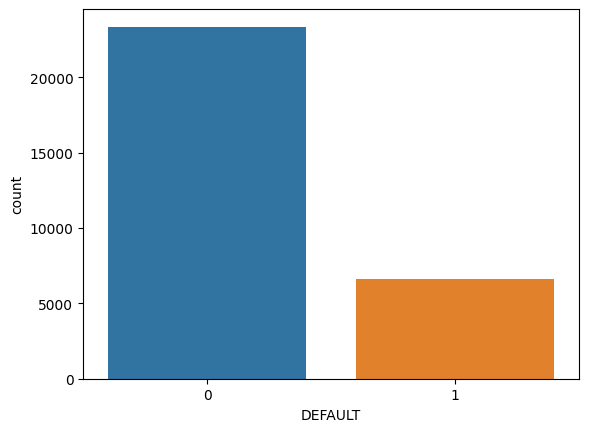

In [24]:
#Distribution of categories in the target column 
sns.countplot(x = 'DEFAULT', data = df )
plt.show()

## QUESTIONS 

## 1.How does default status vary across different demographic groups (e.g., gender, education, marital status, age)?


#### Default Status in relation to Gender

<Axes: xlabel='SEX', ylabel='count'>

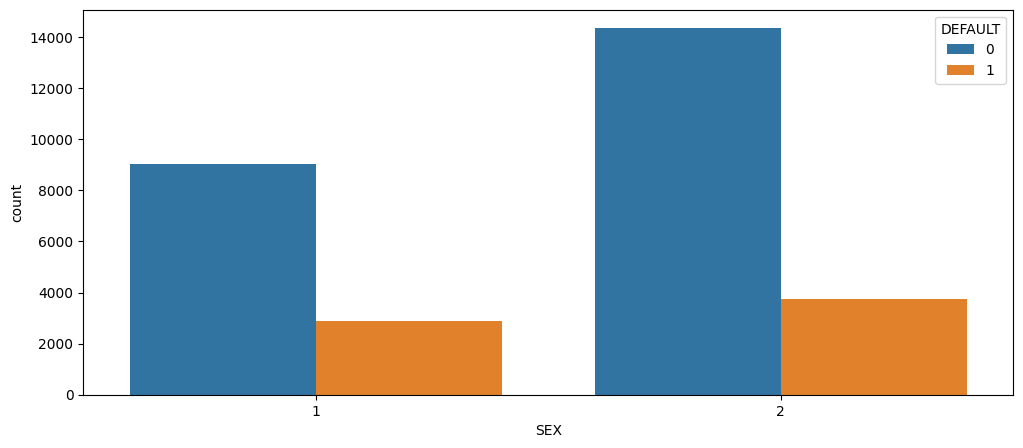

In [25]:
#Countplot for gender
plt.figure(figsize=(12, 5))
plt.subplot(1, 1, 1)
sns.countplot(x='SEX', hue='DEFAULT', data=df)

1 represents males while 2 represents females on the sex label. On the prediction side, 0/blue represents No default while 1/orange represents Default.
Approximately 3,000 men defaulted while 9,000 did not while approximately 4,000 women defaulted while more than 14,000 did not.
In conclusion, women are more likely to default while men are less likely to default.

#### Default in relation to Marital Status

<Axes: xlabel='MARRIAGE', ylabel='count'>

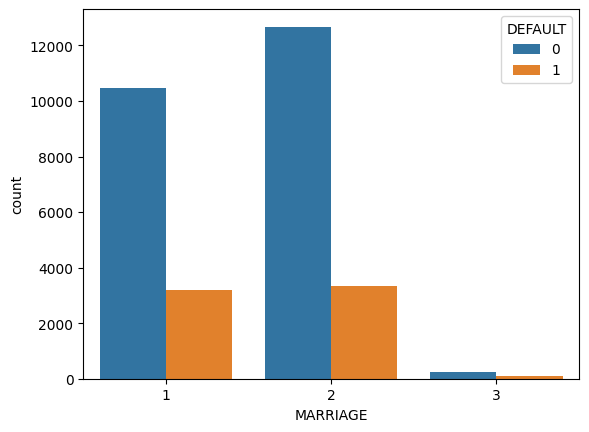

In [26]:
# Countplot for Marital Status
plt.subplot(1,1,1)
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df)

Given (1=married, 2=single, 3=others), single individuals are slightly more likely to default as opposed to married people.

#### Default in relation to Education

<Axes: xlabel='EDUCATION', ylabel='count'>

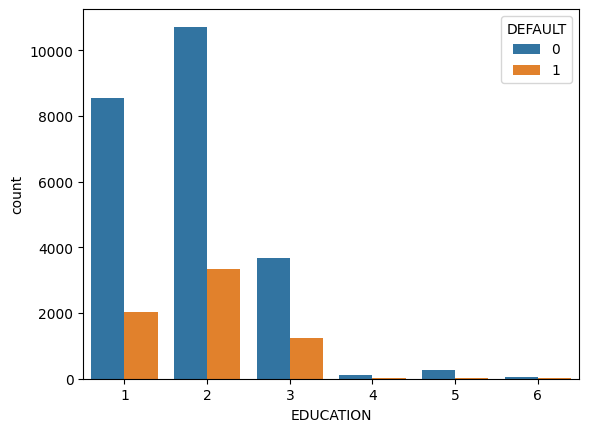

In [28]:
# Countplot for Education
plt.subplot(1, 1, 1)
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)

Given EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), university students have the highest likelihood of default followed by those in graduate school, and finally others.

#### Default in relation to Age

<Axes: xlabel='DEFAULT', ylabel='AGE'>

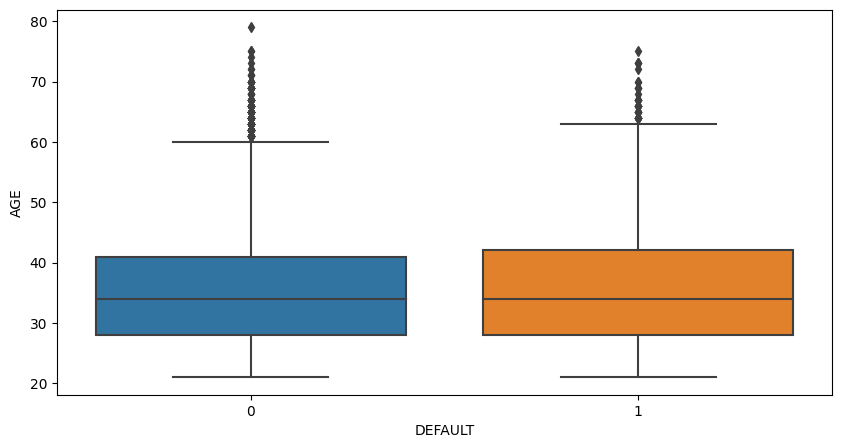

In [ ]:
# Boxplot for Age
plt.figure(figsize=(10, 5))
sns.boxplot(x='DEFAULT', y='AGE', data=df)



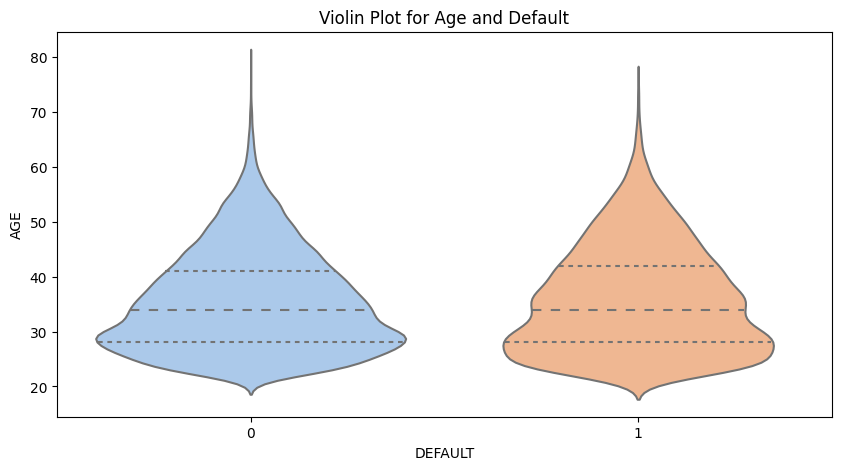

In [31]:


# Violin Plot for Age
plt.figure(figsize=(10, 5))
sns.violinplot(x='DEFAULT', y='AGE', data=df, inner='quartile', palette='pastel')
plt.title('Violin Plot for Age and Default')
plt.show()


From the box plot, there's an indication that as an individual gets older the more they are likely to default.

## 2. Is there a correlation between the credit limit (LIMIT_BAL) and the probability of default


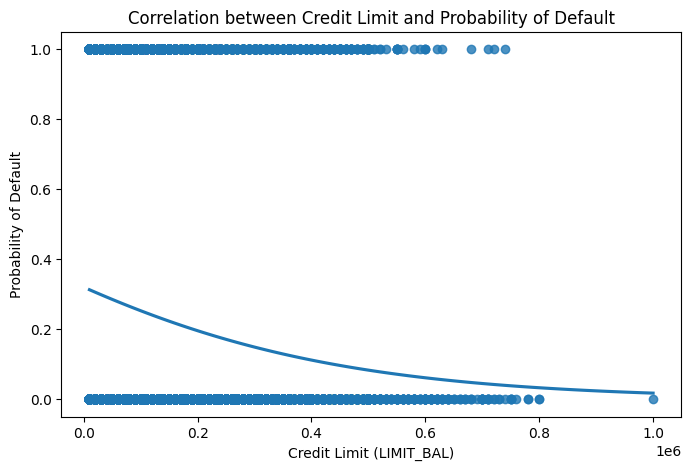

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='LIMIT_BAL', y='DEFAULT', data=df, logistic=True, ci=None)

# Set labels and title
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Probability of Default')
plt.title('Correlation between Credit Limit and Probability of Default')

# Show the plot
plt.show()

From the plot above, the trend line indicates that the higher the credit limit, the lower the chances of one defaulting.


## 3. What is the distribution of default status based on repayment status in the previous months (PAY_0 to PAY_6)?

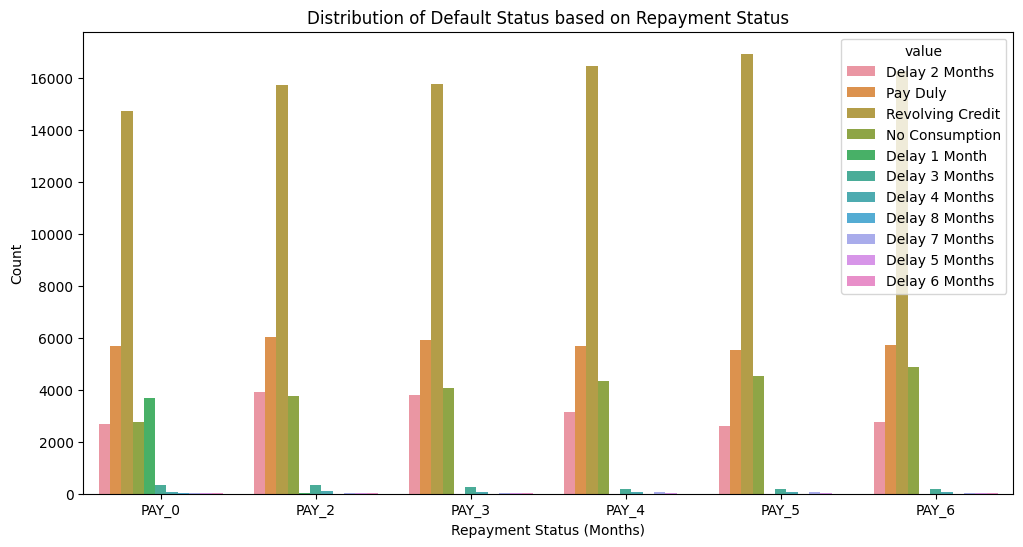

In [ ]:
# Melt the DataFrame to create a tidy format for Seaborn
df_melted = pd.melt(df, id_vars='DEFAULT', value_vars=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

# Map numeric values to descriptions
repayment_status_mapping = {
    -2: 'No Consumption',
    -1: 'Pay Duly',
    0: 'Revolving Credit',
    1: 'Delay 1 Month',
    2: 'Delay 2 Months',
    3: 'Delay 3 Months',
    4: 'Delay 4 Months',
    5: 'Delay 5 Months',
    6: 'Delay 6 Months',
    7: 'Delay 7 Months',
    8: 'Delay 8 Months',
    9: 'Delay 9+ Months'
}

df_melted['value'] = df_melted['value'].map(repayment_status_mapping)

# Create a grouped bar plot using catplot
plt.figure(figsize=(12, 6))
sns.countplot(x='variable', hue='value', data=df_melted)

# Set labels and title
plt.xlabel('Repayment Status (Months)')
plt.ylabel('Count')
plt.title('Distribution of Default Status based on Repayment Status')

# Show the plot
plt.show()

## 4. How do the billing amounts (BILL_AMT1 to BILL_AMT6) relate to the likelihood of default?

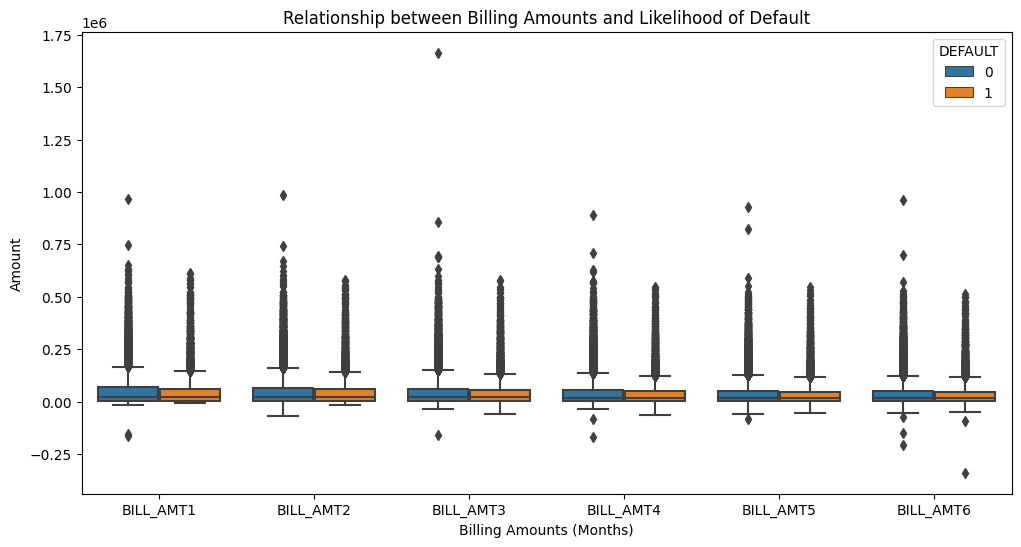

In [ ]:
# Melt the DataFrame to create a tidy format for Seaborn
df_melted = pd.melt(df, id_vars='DEFAULT', value_vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

# Create a box plot or violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='DEFAULT', data=df_melted)

# Set labels and title
plt.xlabel('Billing Amounts (Months)')
plt.ylabel('Amount')
plt.title('Relationship between Billing Amounts and Likelihood of Default')

# Show the plot
plt.show()

## How do the previous payment amounts (PAY_AMT1 to PAY_AMT6) influence the probability of default?

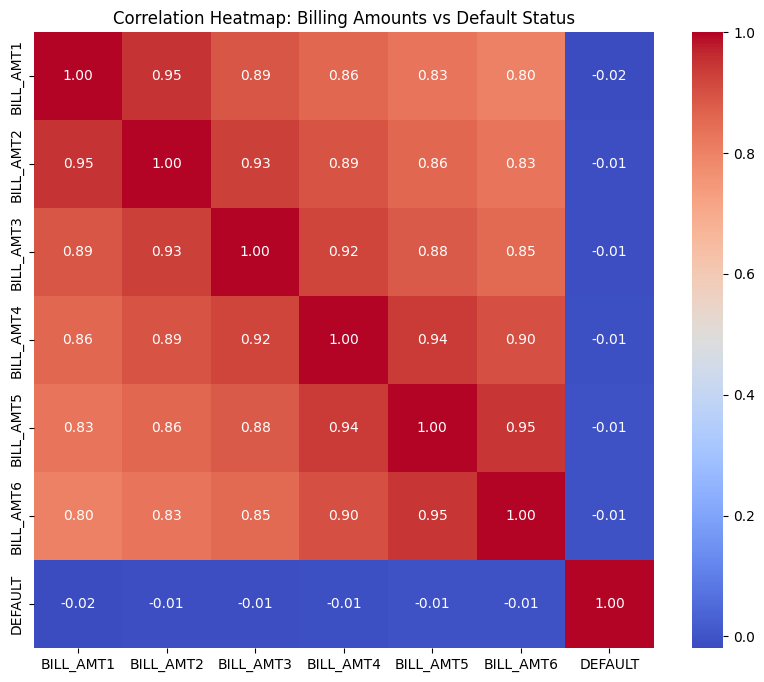

<Figure size 1200x800 with 0 Axes>

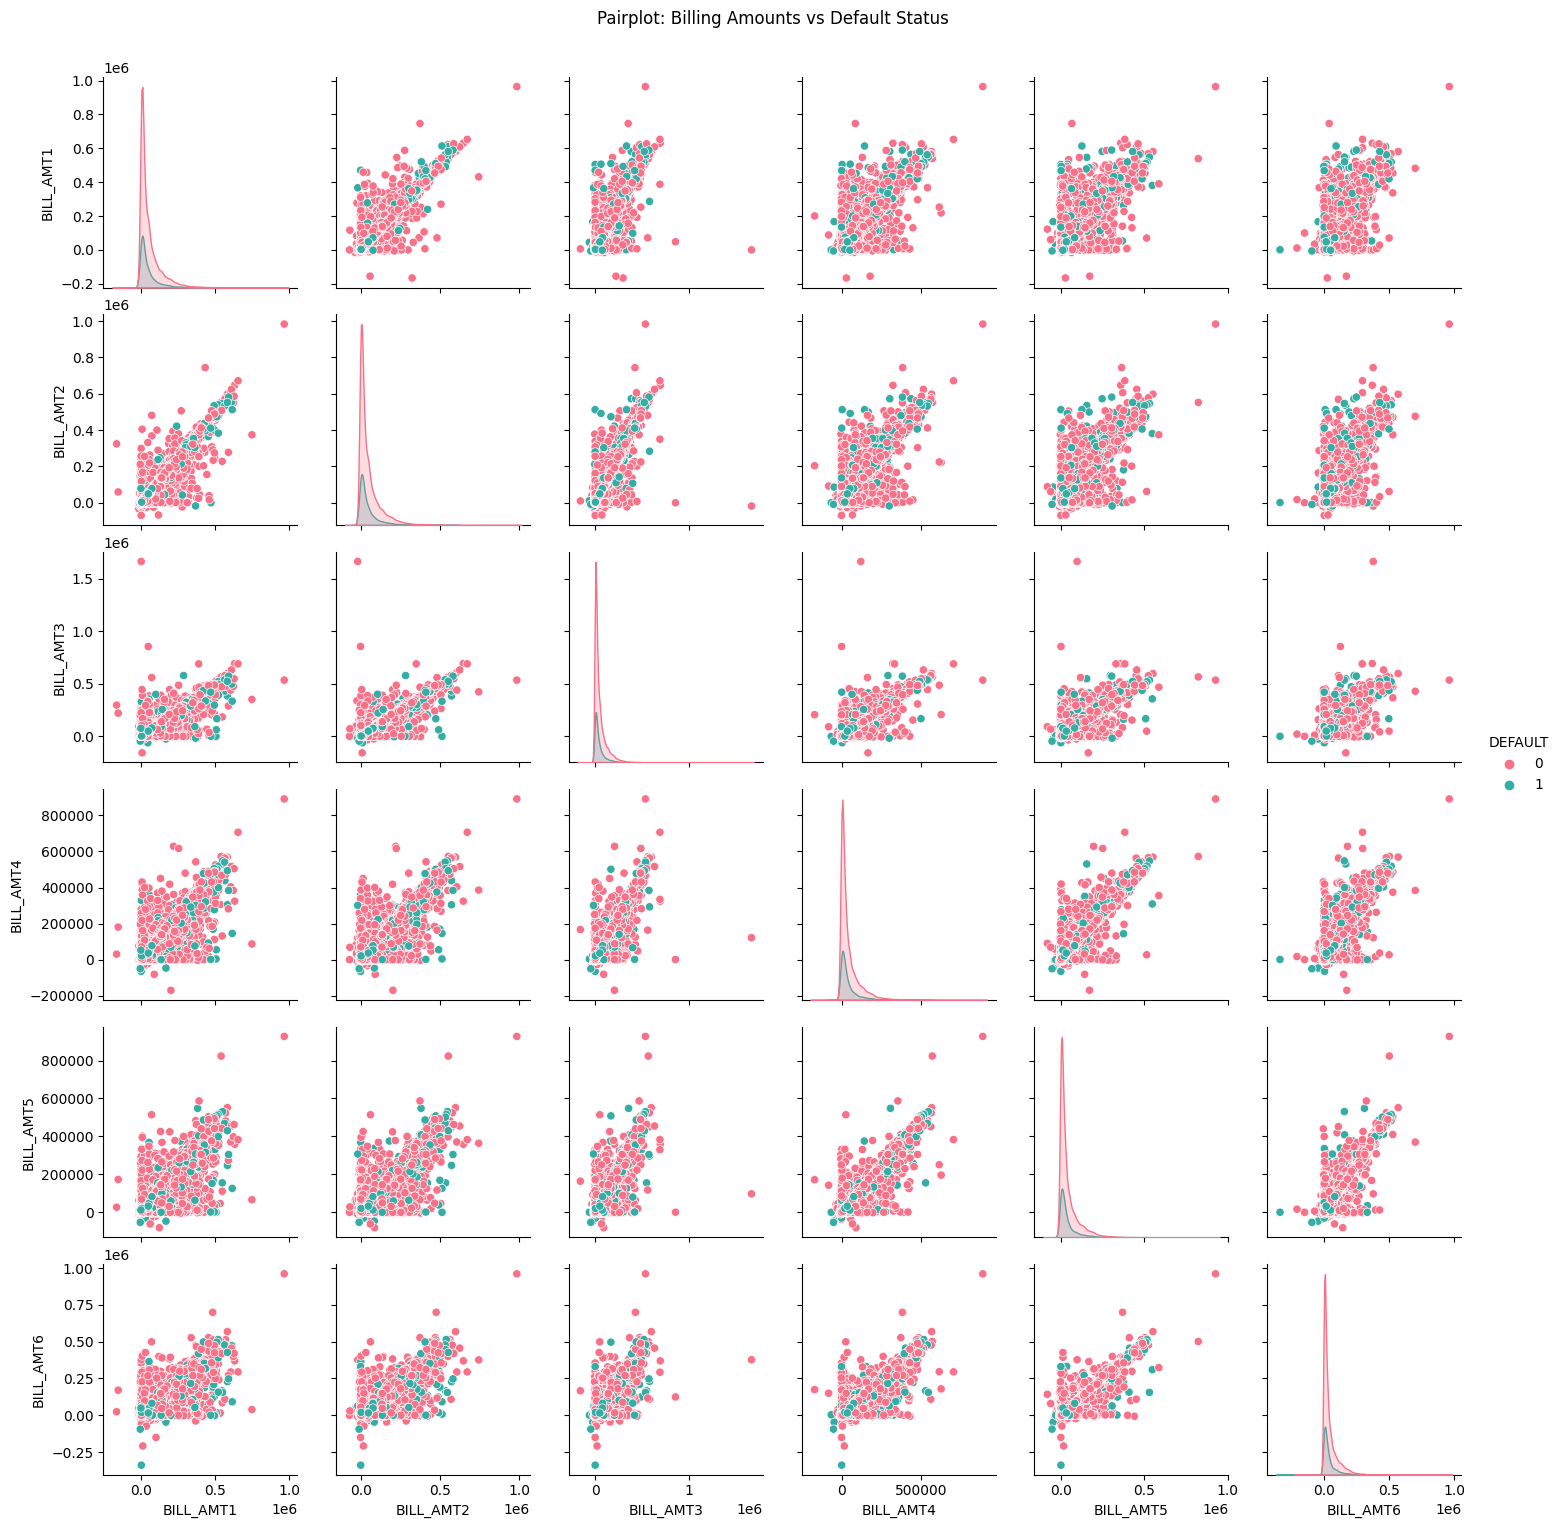

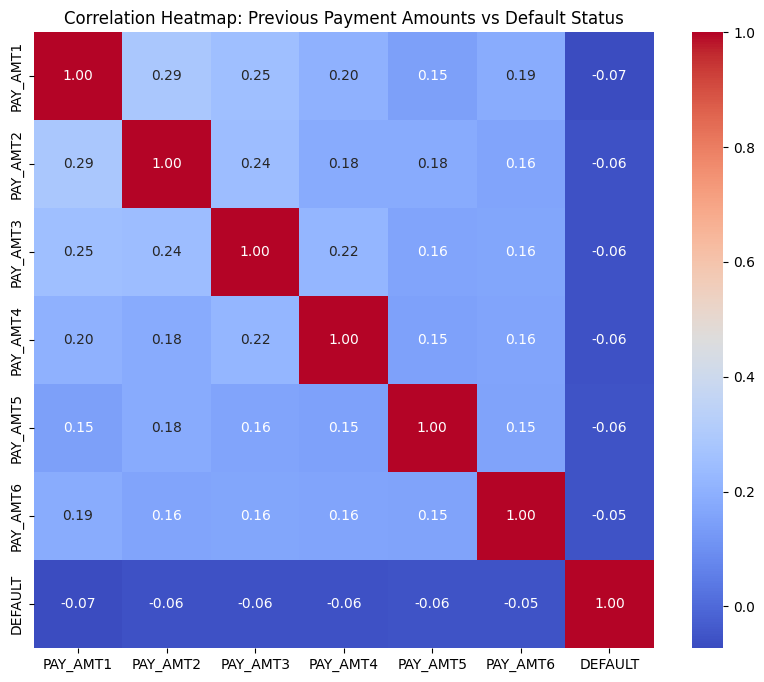

<Figure size 1200x800 with 0 Axes>

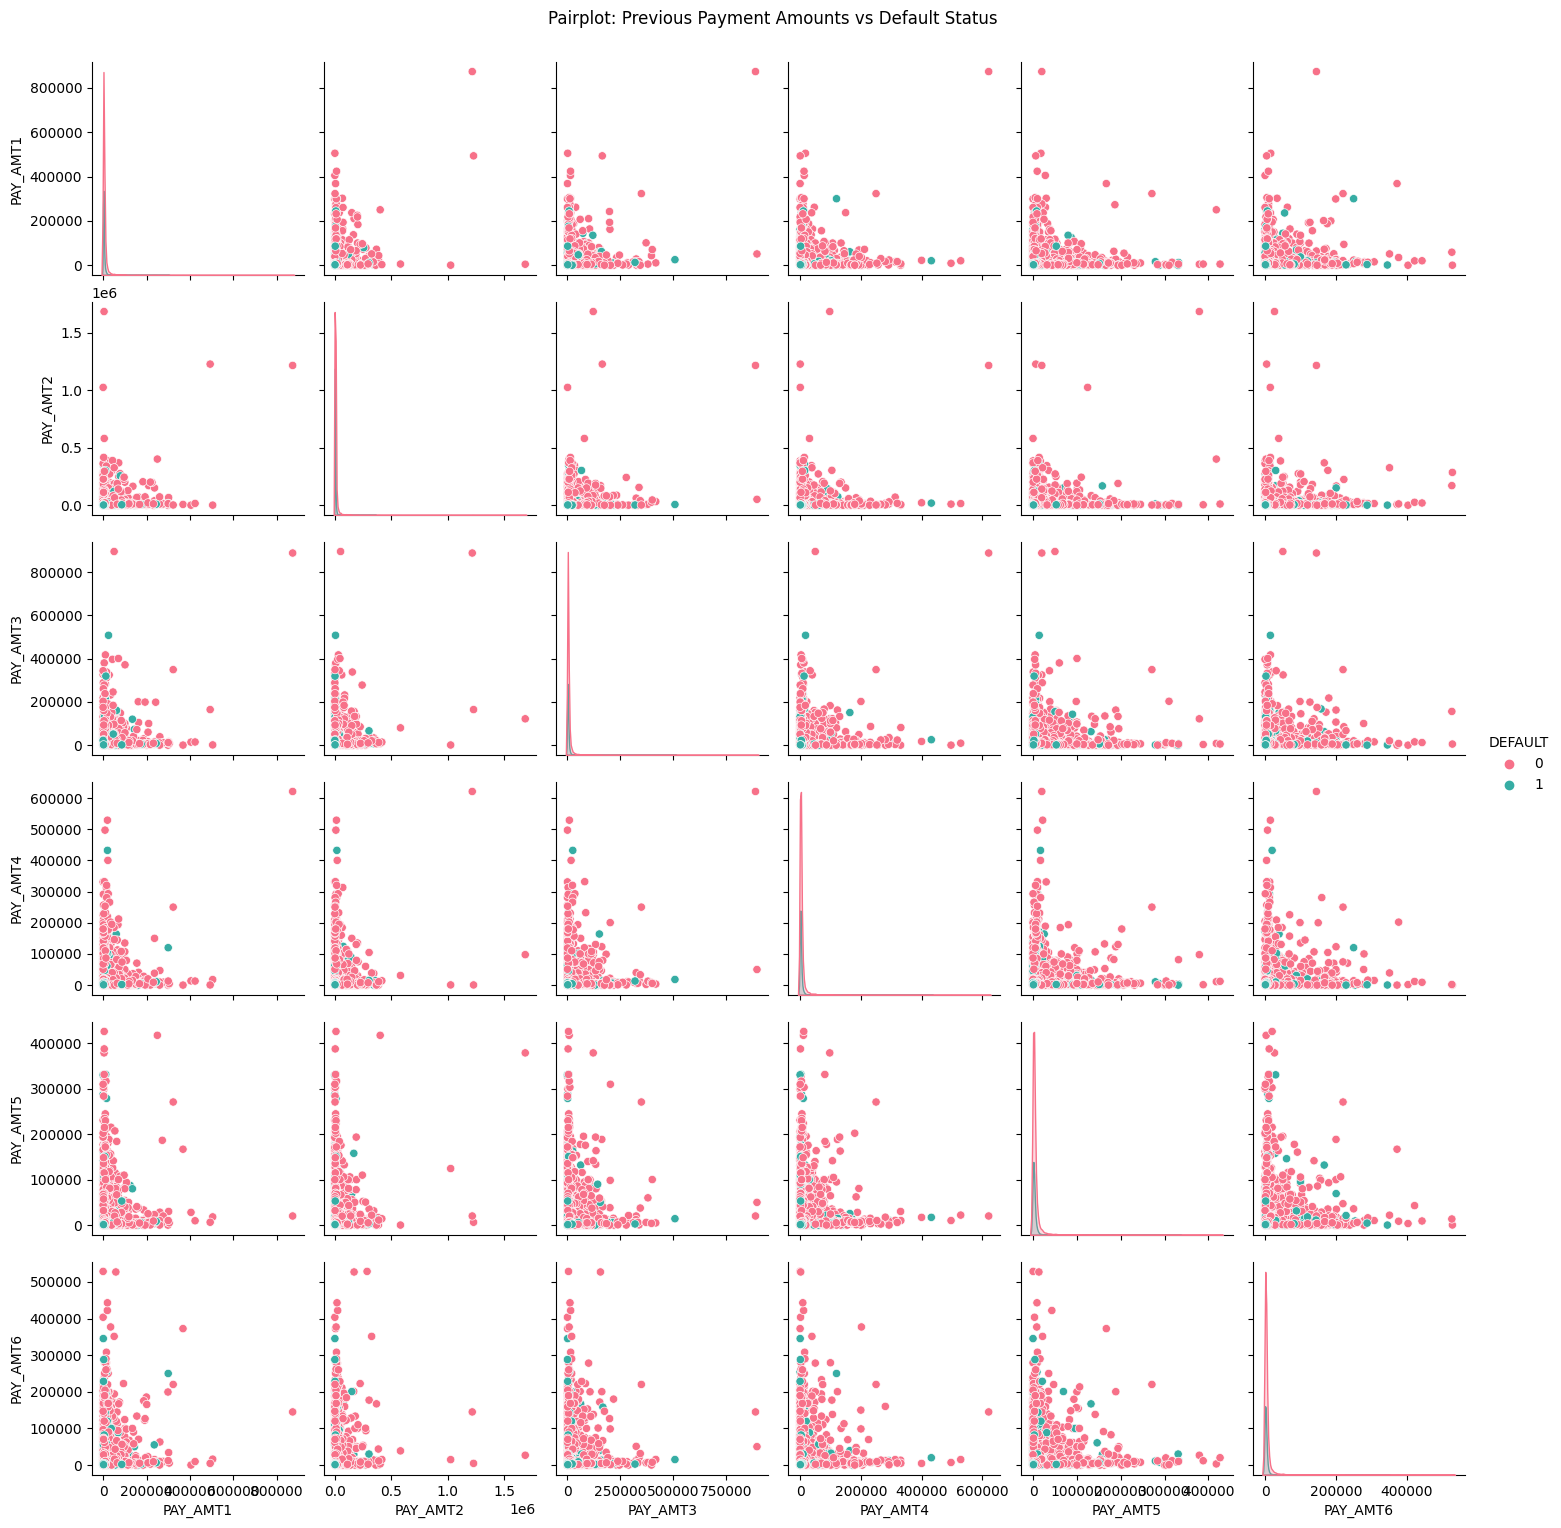

In [ ]:
# Correlation Heatmap for Billing Amounts
plt.figure(figsize=(10, 8))
billing_corr = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'DEFAULT']].corr()
sns.heatmap(billing_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Billing Amounts vs Default Status')

# Pairplot for Billing Amounts
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], hue='DEFAULT', palette='husl')
plt.suptitle('Pairplot: Billing Amounts vs Default Status', y=1.02)

# Correlation Heatmap for Previous Payment Amounts
plt.figure(figsize=(10, 8))
payment_corr = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']].corr()
sns.heatmap(payment_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Previous Payment Amounts vs Default Status')

# Pairplot for Previous Payment Amounts
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], hue='DEFAULT', palette='husl')
plt.suptitle('Pairplot: Previous Payment Amounts vs Default Status', y=1.02)

plt.show()


### Hypothesis testing

In [ ]:


# Ensure that categorical variables are encoded properly (e.g., 0/1 for default, 1/2 for education)
# Use dummy encoding or one-hot encoding for categorical variables if needed

# Hypothesis 1: Credit Limit and Default
# credit_limit_low = df[df['LIMIT_BAL'] < 499,999]
# credit_limit_high = df[df['LIMIT_BAL'] >= 500,000]

# t_stat, p_value_credit_limit = ttest_ind(credit_limit_low['DEFAULT'], credit_limit_high['DEFAULT'])
# print(f"P-value for credit limit and default: {p_value_credit_limit}")

# Hypothesis 2: Education Level and Default
contingency_table = pd.crosstab(df['EDUCATION'], df['DEFAULT'])
chi2_stat, p_value_education, _, _ = chi2_contingency(contingency_table)
print(f"P-value for education level and default: {p_value_education}")

# Hypothesis 3: Payment Behavior and Default
payment_behavior_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
consistent_payment = df[payment_behavior_cols].apply(lambda row: all(val == -1 for val in row), axis=1)

contingency_table_payment = pd.crosstab(consistent_payment, df['DEFAULT'])
chi2_stat_payment, p_value_payment, _, _ = chi2_contingency(contingency_table_payment)
print(f"P-value for payment behavior and default: {p_value_payment}")

# Logistic Regression: Age and Default
X_age = sm.add_constant(df['AGE'])
y_default = df['DEFAULT']

logit_model = sm.Logit(y_default, X_age)
logit_result = logit_model.fit()
print(logit_result.summary())


P-value for education level and default: 1.2332626245415605e-32
P-value for payment behavior and default: 2.7136032930803052e-18
Optimization terminated successfully.
         Current function value: 0.528327
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29998
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:               0.0001817
Time:                        18:40:02   Log-Likelihood:                -15850.
converged:                       True   LL-Null:                       -15853.
Covariance Type:            nonrobust   LLR p-value:                   0.01637
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

From the above, we can conclude that;
Hypothesis testing revealed that education level and payment behavior significantly affect the likelihood of default.

Logistic regression was used to model the relationship between the age of customers and the likelihood of default. The p-value for age is 0.016, indicating a statistically significant association.

## Feature Engineering

#### Data Splitting

In [ ]:
#Split data into X, y(Independent, Dependent)
X = df.drop(columns=['DEFAULT']).copy()
y = df['DEFAULT'].copy()


In the code  we are using copy() to copy the data by value. By default, pandas uses copy by reference. Using copy() ensures that the original data df_downsample is not modified when we modify X or y.In other words, if we make a mistake when we are formatting the columns for classification trees, we can just re-copy df_downsample, rather than reload the original data and remove the missing values

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

 ## One Hot Encoding
 
 It looks like SEX, EDUCATION, MARRIAGE and PAY_ are supposed to be categorical and need to be modified. This is because, while scikit learn natively support continuous data, like LIMIT_BAL and AGE, they do not natively support categorical data, like MARRIAGE, which contains 3 different categories. Thus, in order to use categorical data with scikit learn, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called One-Hot Encoding.

At this point you may be wondering, "what's wrong with treating categorical data like continuous data?" To answer that question, let's look at an example: For the MARRIAGE column, we have 3 options:

Married
Single
Other
If we treated these values, 1, 2, and 3, like continuous data, then we would assume that 3, which means "Other", is more similar to 2, which means "Single", than it is to 1, which means "Married". That means the support vector machine would be more likely to cluster the people with 3s and 2s together than the people with 3s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering people with 3s with 2s is the same as clustering 3s with 1s, and that approach is more reasonable.

There are many different ways to do One-Hot Encoding in Python. Two of the more popular methods are ColumnTransformer() (from scikit-learn) and get_dummies() (from pandas), and the both methods have pros and cons. ColumnTransformer() has a very cool feature where it creates a persistent function that can validate data that you get in the future. For example, if you build your model using a categorical variable favorite color that has red, blue and green options, then ColumnTransformer() can remember those options and later on when your Support Vector Machine is being used in a production system, if someone says their favorite color is orange, then ColumnTransformer() can throw an error or handle the situation in some other nice way. The downside of ColumnTransformer() is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of Column Transformer() worked as you intended it to. In contrast, get_dummies() leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that ColumnTransformer() has. 


In [ ]:
#Encoding the categorical columns

X_encoded = pd.get_dummies(X, columns=['SEX',
                                        'EDUCATION', 
                                        'MARRIAGE', 
                                        'PAY_0',
                                        'PAY_2',
                                        'PAY_3',
                                        'PAY_4',
                                        'PAY_5',
                                        'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,1,0,0,0,0,0,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


## Data Splitting
We split the data into training and testing datasets and then scale them separately to avoid Data Leakage. Data Leakage occurs when information about the training dataset currupts or influences the testing dataset.

In [ ]:
# Assuming X_encoded is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,test_size=0.2, random_state=42)


## Building Machine Learning Models, Decision Tree & XGBoost Classifiers

In [ ]:
# Create a pipeline for Decision Trees
dt_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),  # You can customize the preprocessor
    ('classifier', DecisionTreeClassifier(random_state=42))
])
# Fit and evaluate the Decision Tree model
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix)

Decision Tree Model:
Accuracy: 0.7255
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.73      0.73      0.73      6000

Confusion Matrix:
 [[3801  886]
 [ 761  552]]


The Decision tree model has an accuracy score of 72.55%

In [ ]:
# Create a pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', StandardScaler()),  # You can customize the preprocessor
    ('classifier', XGBClassifier(random_state=42))
])

# Fit and evaluate the XGBoost model
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print("\nXGBoost Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix)


XGBoost Model:
Accuracy: 0.8176666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:
 [[4423  264]
 [ 830  483]]


The XGBoost Model has an accuracy score of 81.77%

## ROC CURVE
ROC(Receiver Operating Characteristic) curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) at various thresholds

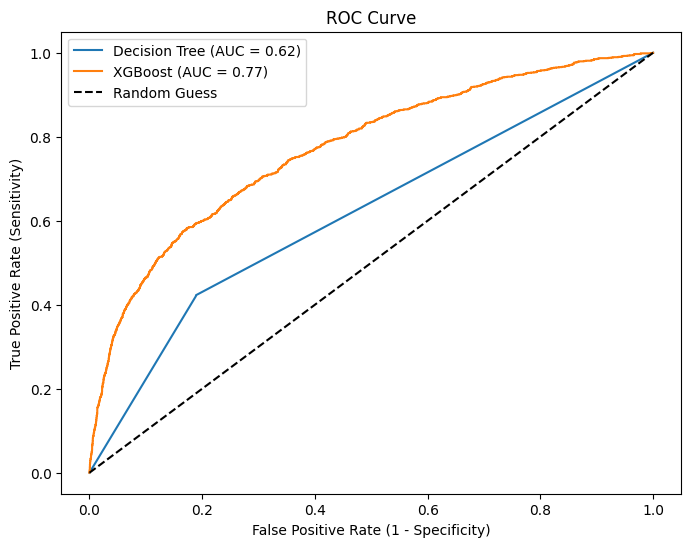

In [ ]:

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probability of being class 1 (default)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Model Evaluation using Confusion Matrix



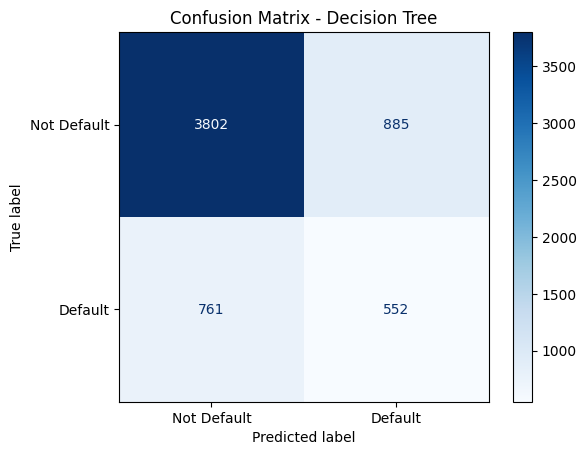

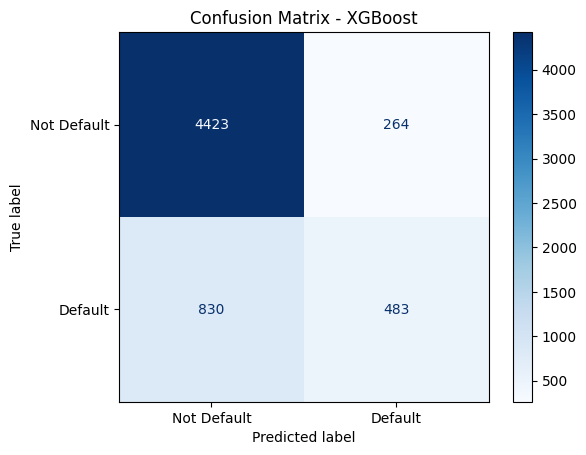

In [ ]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Default', 'Default'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Plot confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Default', 'Default'])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()

Interpretation:

True Positive (TP): Instances that are actually positive and predicted as positive.
True Negative (TN): Instances that are actually negative and predicted as negative.
False Positive (FP): Instances that are actually negative but predicted as positive (Type I error).
False Negative (FN): Instances that are actually positive but predicted as negative (Type II error).

In our case, our Decision Tree Model Predicted 3802 and 552 values correctly while it missed on 761 and 885 values
On the other hand, our XGBoost Model predicted 4423 and 483 models correctly while it missed 830 and 264 values.

## Hyperparameter Tuning
From the results above, it would be appropriate to perform Hyperparameter Tuning.
 This process involves systematically trying different combinations of hyperparameter values to find the ones that result in the best model performance.
For Decision Trees and XGBoost, parameters such as tree depth, learning rate, and regularization strength can significantly impact performance.

In [ ]:
# Define the hyperparameter distributions for Randomized Search
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search with parallel processing for Decision Tree
random_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_dist_dt, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)

# Print the best hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:")
print(random_search_dt.best_params_)

# Create XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform Randomized Search with parallel processing for XGBoost
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters for XGBoost
print("\nBest Hyperparameters for XGBoost:")
print(random_search_xgb.best_params_)



Best Hyperparameters for Decision Tree:
{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}

Best Hyperparameters for XGBoost:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


RandomizedSearchCV is used instead of GridSearchCV to randomly sample hyperparameter combinations, reducing the number of combinations to evaluate.
The n_iter parameter controls the number of random combinations to try.
n_jobs=-1 enables parallel processing, utilizing all available CPU cores.
param_distributions is used instead of param_grid to specify hyperparameter distributions for random sampling.
These adjustments should speed up the hyperparameter tuning process while still finding good hyperparameter combinations. Feel free to adjust the n_iter value based on your computational resources and the time available for tuning

## Retrain the better Model

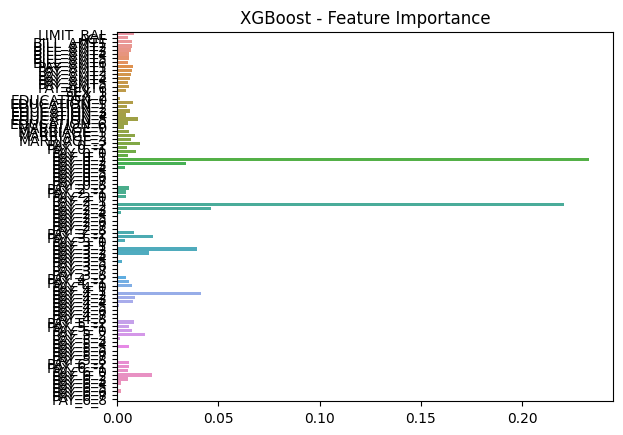

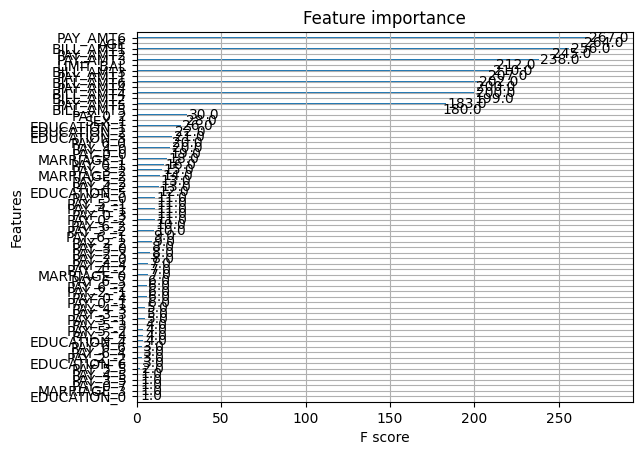

In [ ]:
# Assuming your XGBoost model is named xgb_model

# XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)



importances = xgb_model.feature_importances_
feature_names = X_encoded.columns


sns.barplot(x=importances, y=feature_names)
plt.title("XGBoost - Feature Importance")
plt.show()
#Assuming xgb_model is your trained XGBoost model
plot_importance(xgb_model)
plt.show()




Cumulative Importance:

Sort the features by importance in descending order and calculate the cumulative sum of importances. Plotting this cumulative sum can help you see how much cumulative importance is retained as you include more features. You can set your threshold based on where you want to cut off the cumulative sum.

In [ ]:

importances = xgb_model.feature_importances_
feature_names = X_encoded.columns
sorted_idx = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_idx])

total_importance = np.sum(importances)
threshold_percentage = 0.95
threshold_value = total_importance * threshold_percentage

total_importance = np.sum(importances)
threshold_percentage = 0.95
threshold_value = total_importance * threshold_percentage

sorted_idx = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_idx])

# Find the index where cumulative importance exceeds the threshold
selected_features_idx = np.where(cumulative_importance > threshold_value)[0][0]

# Select the top features based on the threshold
top_features = feature_names[sorted_idx][:selected_features_idx + 1]

# Use the selected features for further analysis
X_selected = X_encoded[top_features]

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)




In [ ]:
# # Select top features based on importance
# top_features = feature_names[importances > ]  # Set a threshold based on the visualization
# X_selected = X_encoded[top_features]

# #Data Splitting 

# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# # print(X_train.shape)
# # X_train.isnull().sum()


Series([], dtype: float64)

In [ ]:
#Retraining model


# Retraining model with best hyperparameters
xgb_model_retrained = XGBClassifier(subsample=0.8, n_estimators=200, max_depth=3, learning_rate=0.1, colsample_bytree=1.0)

try:
    # Fit the model on the training data
    xgb_model_retrained.fit(X_train, y_train)
    print("XGBoost Model Retraining Successful!")
except Exception as e:
    print(f"Error during XGBoost Model Retraining: {e}")




XGBoost Model Retraining Successful!


In [ ]:
#Model Evaluation

# Make predictions
y_pred = xgb_model_retrained.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.8217
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:
 [[4461  226]
 [ 844  469]]


Our model has improved from an accuracy score of 81.7% to 82.17%

## Model Persistence

In [ ]:



# Save Decision Trees model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

# Save XGBoost model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model_retrained, file)

# Load Decision Trees model
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_dt_model = pickle.load(file)

# Load XGBoost model
with open('xgboost_model.pkl', 'rb') as file:
    loaded_xgb_model = pickle.load(file)


## Evaluate Model with test Dataset

Decision Trees Model:
Accuracy: 0.7215
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000

Confusion Matrix:
[[3786  901]
 [ 770  543]]

XGBoost Model:
Accuracy: 0.8216666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:
[[4461  226]
 [ 844  469]]


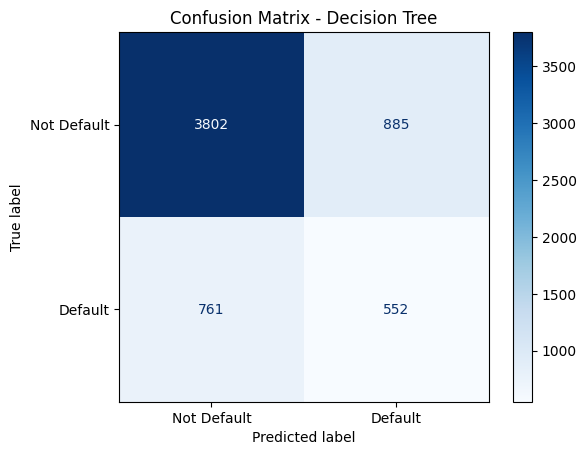

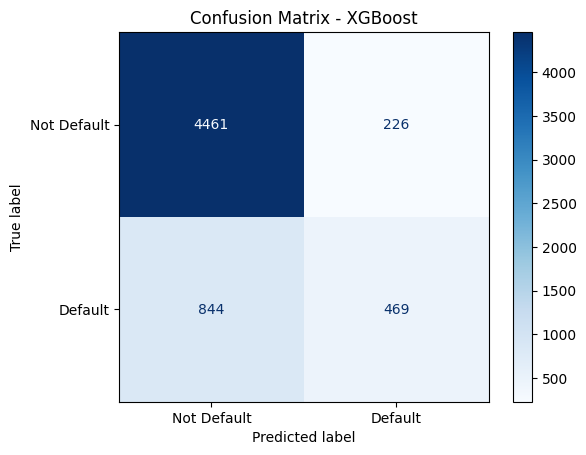

In [ ]:

# # Evaluate Decision Trees model
loaded_dt_model.fit(X_train, y_train)
loaded_xgb_model.fit(X_train, y_train)
dt_predictions = loaded_dt_model.predict(X_test)

# Print Decision Trees evaluation metrics
print("Decision Trees Model:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Evaluate XGBoost model
xgb_predictions = loaded_xgb_model.predict(X_test)

# Print XGBoost evaluation metrics
print("\nXGBoost Model:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Default', 'Default'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Plot confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Not Default', 'Default'])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost')
plt.show()



## Load test Data

REMAINING TASKS.
1.Deal with unknown values
2.Build Streamlit Application
3.Change Visualizations


## Save the Data to CSV